**Name: Hoda Shoghi**

**Contact: hoda.shoghi@gmail.com**

**Date: 05 Sep 2023**

## Table of Contents

1. [**Introduction**](#Introduction)
    * [Dataset Overview](#Dataset-Overview)
    * [Goal](#Goal)
2. [**Basic Data Wrangling**](#Basic-Data-Wrangling)
    * [Dataset Shape](#Dataset-Shape)
    * [Data Types & Distribution](#Data-Types-&-Distribution)
    * [Duplicates & Redundancy](#Duplicates-&-Redundancy)
    * [Null Value Handling](#Null-Value-Handling)
    * [Feature Removal](#Feature-Removal)
        * ["is_open" Column](#is_open-Column)
        * ["state" Column](#state-Column)
    * [Target Variable Analysis](#Target-Variable-Analysis)
        * [Descriptive Statistics for "stars"](#Descriptive-Statistics-for-stars)
        * [Transforming the "stars" column into a binary variable](#Transforming-stars)
    * [Missing Values in "categories" and "attributes"](#Missing-Values)
    * ["categories" Column Processing](#categories-Column-Processing)
        * [Standardization](#Standardization)
        * [Filtering for restaurants](#Filtering-for-restaurants)
        * [Category Flattening](#Category-Flattening)
        * [One-Hot Encoding](#One-Hot-Encoding)
        * [Handling Low-Count Categories](#Handling-Low-Count-Categories)
    * [Correlation Analysis](#Correlation-Analysis)
        * [Identifying Highly Correlated Variable Pairs](#Identifying-Highly-Correlated)
        * [Handling Highly Correlated Variables](#Handling-Highly-Correlated-Variables)
4. [**Attribute Column Analysis**](#Attribute-Column-Analysis)

5. [Checking for Duplicate Information](#Duplicate-Information)
    . [Finding Redundant Columns](#Finding-Redundant-Columns)
6. [Data Conversion](#Converting-binary-columns-to-uint8)

7. [Correlation Analysis](#Correlation-Analysis)
8. [Saving cleaned data to csv](#Saving-the-cleaned-data)

 


# Introduction

### Project Title: 

# Predicting Restaurant Ratings: A Data-Driven Approach


# Dataset-Overview
The Yelp dataset offers a wealth of information about businesses across several cities. This project focuses specifically on restaurant businesses. The dataset includes attributes such as business ID, name, location, review count, categories, and star ratings.

| COLUMN NAME  | DESCRIPTION                                                    | DATA TYPE |
|--------------|----------------------------------------------------------------|-----------|
| business_id  | Unique identifier for the business                             | string    |
| name         | Name of the business                                           | string    |
| address      | Address where the business is located                          | string    |
| city         | City where the business is located                             | string    |
| state        | State where the business is located                            | string    |
| postal_code  | postal_code where the business is located                      | string    |
| latitude     | Geographical latitude of the business                          | float64   |
| longitude    | Geographical longitude of the business                         | float64   |
| stars        | Star rating of the business                                    | float64   |
| review_count |  Number of reviews the business has received                   | int64     |
| is_open      | 0 is closed and 1 is open                                      | int64     |
| attributes   | Dict-different attribute like payment method,  , etc | string  |
| categories   | Categories the business falls under                            | string    |
| hours        | Dict-Hours of operation                                        | string    |


#### Data Notes :
1- Yelp's dataset covers various types of businesses. For this project, I focus on businesses categorized as "Restaurants".

2- The `categories` column can contain multiple categories for a single business. For example, a restaurant can be categorized as both 'Italian' and 'Pizza'.

3- Yelp users rate businesses on a scale of 1 to 5 stars. This serves as our target variable, which we aim to predict with our model.

4- `attribute` Column contains dictionary of different attributes and their values

5- There are some nested dictionaries inside `attributes` Column like `Ambience` or `Business Parking`

# Goal

My goal is to build a predictive model that can accurately predict a restaurant's star rating by leveraging the vast amount of information in the dataset. This model can provide prospective Steakholders with insights into how certain factors might influence their new establishment's ratings.



# Basic Data Wrangling
What is the shape of the dataframe?

What kind of data is stored in each column? How are they distributed?

Are there any columns that contain duplicate information? If so, remove the redundant columns.

Are there any null values in the dataframe? If so, handle them appropriately.


# Dataset-Shape

First lets open the **jason** datasaet which is downloaded from Yelp website

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_b = pd.read_json('data/yelp_business.json', lines=True)


What's the shape opf data frame?

In [11]:
df_b.shape

(150346, 14)

# Data-Types-&-Distribution

What kind of data is stored in each column?

In [12]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


Lets have a look at the head of the datafram:

In [13]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


# is_open-Column

In [14]:
df_b['is_open'].value_counts()

is_open
1    119698
0     30648
Name: count, dtype: int64

The DataFrame contains a column 'is_open', which carries binary values - 0 signifies a closed business, while 1 indicates an open one. for now we keep all the businesses.

In [15]:
# Group by is_open and get the mean of the stars column
average_ratings = df_b.groupby('is_open')['stars'].mean()

print(average_ratings)


is_open
0    3.510082
1    3.618908
Name: stars, dtype: float64


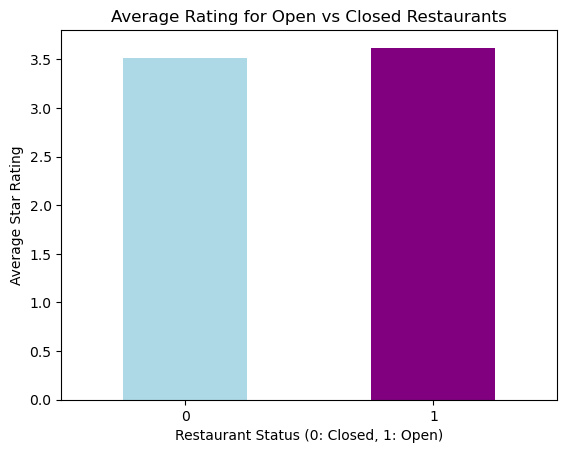

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

average_ratings = df_b.groupby('is_open')['stars'].mean()
average_ratings.plot(kind='bar', color=['lightblue', 'purple'])
plt.title('Average Rating for Open vs Closed Restaurants')
plt.xlabel('Restaurant Status (0: Closed, 1: Open)')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=0)
plt.show()


**From the average_ratings data:**

The average ratings between open and closed restaurants differ only slightly: 3.62 for open establishments and 3.51 for those that have closed. This minuscule difference suggests that while ratings play a role, they might not be the sole or even primary determinant in a restaurant's continued operation. There are likely other factors at play influencing the viability of these businesses.


In [17]:
# Create a crosstab between is_open and stars
cross_tab = pd.crosstab(df_b['stars'], df_b['is_open'], normalize='columns') * 100

print(cross_tab)


is_open          0          1
stars                        
1.0       1.027800   1.396013
1.5       2.551553   3.467059
2.0       5.696946   6.500526
2.5      10.131167   9.366071
3.0      15.426782  11.466357
3.5      21.730619  16.590920
4.0      22.503915  20.240940
4.5      15.155965  18.827382
5.0       5.775255  12.144731


| Rating stars | is_open = 0 (%) | is_open = 1 (%) |
|-------|-----------------|-----------------|
| 1.0   | 1.03           | 1.40           |
| 1.5   | 2.55           | 3.47           |
| 2.0   | 5.70           | 6.50           |
| 2.5   | 10.13          | 9.37           |
| 3.0   | 15.43          | 11.47          |
| 3.5   | 21.73          | 16.59          |
| 4.0   | 22.50          | 20.24          |
| 4.5   | 15.16          | 18.83          |
| 5.0   | 5.78           | 12.14          |



The cross_tab information provides a distribution of ratings for open and closed restaurants. For instance:



/var/folders/0t/7qv1vmrs6l10yk4t5m_54jnr0000gn/T/ipykernel_17399/2484714104.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['stars'], label=label, shade=True)
/var/folders/0t/7qv1vmrs6l10yk4t5m_54jnr0000gn/T/ipykernel_17399/2484714104.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['stars'], label=label, shade=True)


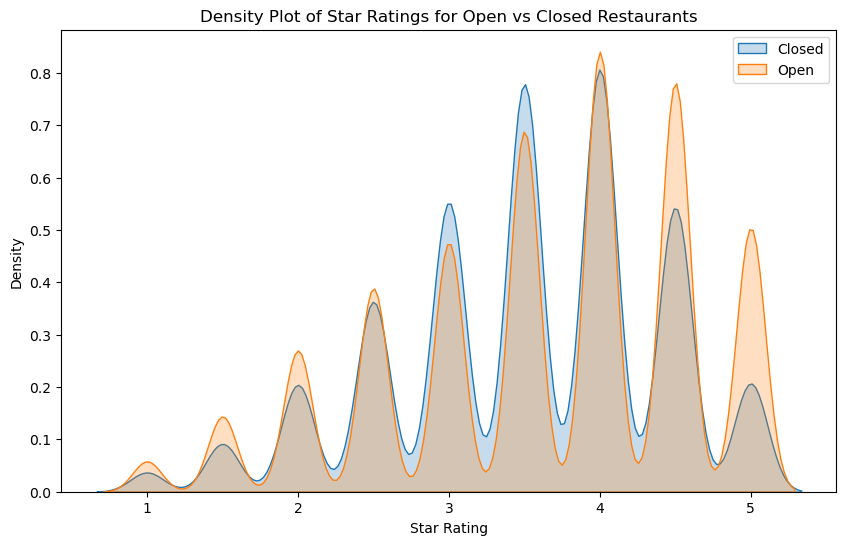

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for status, label in zip([0, 1], ['Closed', 'Open']):
    subset = df_b[df_b['is_open'] == status]
    sns.kdeplot(subset['stars'], label=label, shade=True)
plt.title('Density Plot of Star Ratings for Open vs Closed Restaurants')
plt.xlabel('Star Rating')
plt.ylabel('Density')
plt.legend()
plt.show()


while only about 5.78% of closed restaurants achieved a top rating of 5, a notable 12.14% of open restaurants did. This hints that although a higher rating could contribute to a restaurant's success, other factors might be in play leading to closures

# state-Column

In [19]:
df_b['state'].value_counts()

state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

Examining the value counts reveals that our dataset does not include information for every state in the US. However, to avoid reducing the number of data points, we have decided to retain all of them.

lets have a look at columns again: 

In [20]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


# Feature-Removal

Some of these features are not going to be useful to us. In particular,because we want to focus on features that have the most impact on the restaurant rating so we can remove the following:

In [21]:
df_b.drop(df_b.columns[[0,1,2,3,4,5,6,7,9,10,13]],axis=1,inplace=True)

In [22]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   stars       150346 non-null  float64
 1   attributes  136602 non-null  object 
 2   categories  150243 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


# Target-Variable-Analysis

In [23]:
df_b['stars'].describe()


count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

# Descriptive-Statistics-for-stars

The distribution of the target  doesn't exhibit any extreme anomalies, but let's evaluate it in more detail to see if it's suitable for modeling:

**Mean and Median:** The mean (3.57) and median (3.5) are relatively close to each other, which suggests that the distribution may not be heavily skewed.

**Spread:** The standard deviation (0.68) shows that the ratings are dispersed in a range that isn't too narrow or too wide. This indicates variability in the ratings, which is good for modeling, as a model can learn from this variability.

**Min and Max Values:** The minimum (1) and maximum (5) values align with what would be expected for a star rating system.

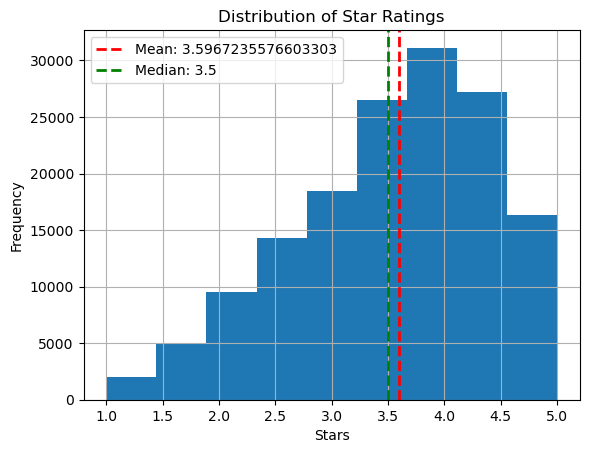

In [24]:
import matplotlib.pyplot as plt

mean_stars = df_b['stars'].mean()
median_stars = df_b['stars'].median()

df_b['stars'].hist(bins=9) 
plt.axvline(mean_stars, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_stars}')
plt.axvline(median_stars, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_stars}')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.legend()
plt.show()


**The mean (3.57) and median (3.5) are relatively close to each other, which suggests that the distribution may not be heavily skewed.**

# Transforming-stars
Target Variable

 Now we want transform the "stars" column into a binary variable to  prepare it for our classification Models 



(array([75733.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 74613.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

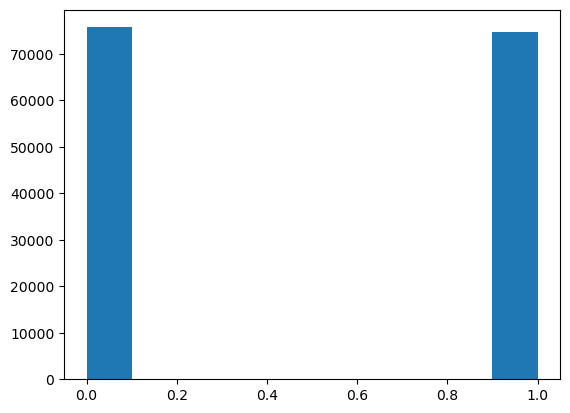

In [25]:
df_b['Rating_Success'] = (df_b['stars'] >= 4).astype(int)
df_b = df_b.drop(columns=['stars'])
plt.figure()
plt.hist(df_b['Rating_Success'])

# Missing-Values

Before examining the contents of the `categories` and `attributes` columns, I observed that they contain some missing values, and I will remove these null values now before proceeding with my analysis.

In [26]:
df_b['categories'].isna().sum()

103

In [27]:
df_b['attributes'].isna().sum()

13744

We must remove the missing values, as they are detrimental to our models.

In [28]:
df_b.dropna(subset=['categories','attributes'], inplace=True)

In [29]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136601 entries, 0 to 150345
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   attributes      136601 non-null  object
 1   categories      136601 non-null  object
 2   Rating_Success  136601 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


# categories-Column-Processing

When analyzing the `categories` column in the DataFrame, df_b. I noticed that the categories is messy and contains a wide array of businesses, not just restaurants.

In [30]:
df_b['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 136601, dtype: object

# Standardization

Next, I wanted to standardize the text in the categories column to prevent any discrepancies due to capitalization or leading/trailing spaces. So, I converted all the category names to lower case using the str.lower() method and removed any unnecessary spaces at the beginning or end of these category names with the str.strip() method.

In [31]:
df_b['categories'] = df_b['categories'].str.lower().str.strip()
df_b.reset_index(drop=True)

df_b.shape

(136601, 3)

In [32]:
df_b['categories'].value_counts().head(10)


categories
beauty & spas, nail salons    950
restaurants, pizza            923
nail salons, beauty & spas    880
pizza, restaurants            809
restaurants, mexican          720
restaurants, chinese          699
mexican, restaurants          656
chinese, restaurants          642
food, coffee & tea            501
beauty & spas, hair salons    469
Name: count, dtype: int64

# Filtering-for-restaurants

 Subsequently, to focus on the businesses that are related to restaurants, I utilized the str.contains() method to filter out such rows. 

In [33]:
df_b = df_b[df_b['categories'].str.contains('restaurants')]
df_b.reset_index(drop=True)
df_b.shape

(51703, 3)

In [34]:
df_b.head()

,attributes,categories,Rating_Success
3,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","restaurants, food, bubble tea, coffee & tea, b...",1
5,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","burgers, fast food, sandwiches, food, ice crea...",0
8,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","pubs, restaurants, italian, bars, american (tr...",0
9,"{'RestaurantsAttire': ''casual'', 'Restaurants...","ice cream & frozen yogurt, fast food, burgers,...",0
11,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","vietnamese, food, restaurants, food trucks",1


# Category-Flattening

The code below first splits the 'categories' column in the df_b DataFrame by commas and assigns the resulting lists to a new DataFrame, df_exploded. Then, it uses the 'explode' method to transform each element of the lists into a separate row, effectively flattening the 'categories' column.

In [35]:
df_exploded = df_b.assign(categories = df_b.categories.str.split(', ')).explode('categories')
df_b.reset_index(drop=True)


,attributes,categories,Rating_Success
0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","restaurants, food, bubble tea, coffee & tea, b...",1
1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","burgers, fast food, sandwiches, food, ice crea...",0
2,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","pubs, restaurants, italian, bars, american (tr...",0
3,"{'RestaurantsAttire': ''casual'', 'Restaurants...","ice cream & frozen yogurt, fast food, burgers,...",0
4,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","vietnamese, food, restaurants, food trucks",1
...,...,...,...
51698,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","restaurants, sandwiches, convenience stores, c...",0
51699,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","cafes, juice bars & smoothies, coffee & tea, r...",1
51700,"{'WheelchairAccessible': 'False', 'Restaurants...","restaurants, mexican",1
51701,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","restaurants, comfort food, food, food trucks, ...",1


Lets prints the value counts of the unique categories, displaying all the rows without any truncation.


In [36]:
with pd.option_context('display.max_rows', None):
    print(df_exploded['categories'].value_counts())


categories
restaurants                         51703
food                                15326
nightlife                            8684
sandwiches                           8304
bars                                 8300
american (traditional)               8102
pizza                                7011
fast food                            6438
breakfast & brunch                   6199
american (new)                       6077
burgers                              5590
italian                              4538
mexican                              4522
coffee & tea                         4037
seafood                              3493
chinese                              3134
event planning & services            3049
salad                                3039
chicken wings                        2931
cafes                                2733
delis                                2376
caterers                             2048
specialty food                       1997
bakeries               

 We need to apply one-hot encoding to these categories, but before doing that, it's advisable to first identify and handle the categories that have very low value counts

**Reducing Dimensionality:** In this datasets, categorical features have many unique categories, some of which occur very infrequently. If we one-hot encode these categories directly, we may end up with a large number of binary features, each representing a unique category. This can significantly increase the dimensionality of the data. By first selecting and possibly combining or removing categories with very low value counts, we can reduce the number of binary features that will be created, keeping the dimensionality more manageable.

**Handling Noise:** Categories with very low value counts might represent noise or anomalies in the data. These rare categories might not provide meaningful information for predictive modeling and could even harm the model's performance by introducing randomness or bias. By identifying and handling these categories separately, we can make the one-hot encoding more robust to such noise.

**Improving Model Generalization:** Rare categories that appear only a few times in the training data may lead to overfitting, where the model learns to memorize these specific instances rather than generalizing from them. By handling these low-count categories separately (for example, by combining them into an "other" category), we can help the model to generalize better from the data.

Let's create a list of categories with very low counts, so we can remove them later on.

In [37]:
# Finding the categories that have counts less than 100 in the 'categories' column of the df_exploded DataFrame
categories_with_low_counts = df_exploded['categories'].value_counts()

# Storing these low-count categories in the 'low_count_categories' list 
low_count_categories = categories_with_low_counts[categories_with_low_counts < 100].index.tolist()
#and printing the list
print(low_count_categories)



['international grocery', 'flowers & gifts', 'pretzels', 'puerto rican', 'cupcakes', 'cantonese', 'gelato', 'kebab', 'butcher', 'beauty & spas', 'live/raw food', 'golf', 'cheese shops', 'internet cafes', 'lebanese', 'wineries', 'peruvian', 'turkish', 'taiwanese', 'local services', 'brazilian', 'custom cakes', 'british', 'hot pot', 'donairs', 'kosher', 'shaved ice', 'organic stores', 'health & medical', 'pop-up restaurants', 'pan asian', 'pool halls', 'home services', 'colombian', 'smokehouse', 'ethiopian', 'bed & breakfast', 'drugstores', 'do-it-yourself food', 'fashion', 'casinos', 'home & garden', 'patisserie/cake shop', 'whiskey bars', 'salvadoran', 'education', 'chocolatiers & shops', 'wedding planning', 'empanadas', 'shopping centers', 'florists', 'bowling', 'arts & crafts', 'moroccan', 'laotian', 'venezuelan', 'tiki bars', 'tours', 'brasseries', 'cafeteria', 'art galleries', 'dominican', 'afghan', 'gay bars', 'polish', 'performing arts', 'kids activities', 'personal chefs', 'russ

# One-Hot-Encoding
In the preprocessing stage of our data, we have multiple categories represented as comma-separated strings. These need to be transformed into a format that can be understood by machine learning algorithms. The following steps outline this transformation process:

1. **Lowercasing and Stripping Whitespace**: We first convert the 'categories' column to lowercase and remove any extra whitespace to ensure uniformity.

2. **Splitting Categories**: The 'categories' are split based on commas into a list of categories for each record.

3. **Resetting the Index**: This is done to ensure alignment between the original DataFrame and the subsequent one we'll create with one-hot encoding.

4. **One-Hot Encoding**: We utilize the `MultiLabelBinarizer` from scikit-learn to transform the categories into a binary matrix. This creates a new column for each unique category, with a 1 or 0 indicating its presence.

5. **Creating a DataFrame**: The binary matrix is converted into a DataFrame, with column names corresponding to the unique categories.

6. **Concatenating with the Original DataFrame**: The one-hot encoded DataFrame is concatenated with the original DataFrame, adding the new binary columns.

7. **Dropping the Original 'categories' Column**: Optionally, the original 'categories' column is dropped as it has now been represented in the one-hot encoded format.

By the end of this process, our original DataFrame `df_b` contains binary columns representing the presence or absence of each category, ready for further analysis or modeling.


In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

# Splitting the categories on commas and stripping any extra whitespace
df_b['categories'] = df_b['categories'].str.lower().str.strip().apply(lambda x: x.split(', '))

# Resetting the index to ensure alignment
df_b.reset_index(drop=True, inplace=True)

# Using MultiLabelBinarizer to one-hot encode the categories
mlb = MultiLabelBinarizer()
categories_encoded = mlb.fit_transform(df_b['categories'])

# Convert the one-hot encoded categories into a DataFrame
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)

# Concatenate this DataFrame with the original one
df_b = pd.concat([df_b, categories_df], axis=1)

# Drop the original 'categories' column (if desired)
df_b = df_b.drop(columns='categories')


In [39]:
df_b.shape

(51703, 717)

# Handling-Low-Count-Categories
After one-hot encoding the categories, we might end up with a high dimensionality if there are many unique categories. Some of these categories might only appear a few times in the dataset. Such low-count categories can sometimes introduce noise or complexity without adding much informative value.




In [40]:
for col in low_count_categories:
    if col in df_b.columns:
        df_b.drop(columns=col, inplace=True)
df_b = df_b.reset_index(drop=True)


By the end of this process, our DataFrame `df_b` has been streamlined, with all the columns corresponding to the identified low-count categories removed. This can help in reducing dimensionality, improving computational efficiency, and potentially enhancing the performance of subsequent modeling.

In [41]:
df_b.shape

(51703, 134)

# Correlation-Analysis
Correlation between variables can often reveal interesting relationships, but high correlation can sometimes be a concern in modeling as it may lead to multicollinearity. This code snippet is focused on identifying pairs of variables in the DataFrame `df_b` that have a correlation greater than 0.50.

# Identifying-Highly-Correlated

Here's what the code does:


1. **Calculating the Correlation Matrix**: Using the `corr` method, we compute the correlation matrix for the DataFrame `df_b`. This matrix contains the Pearson correlation coefficients between all pairs of variables.

2. **Initializing a List for Highly Correlated Pairs**: We create an empty list called `highly_correlated_pairs` to store the variable pairs that meet our correlation threshold.

3. **Iterating Through the Matrix**: We use nested loops to iterate through the correlation matrix, examining each pair of variables.

4. **Checking for High Correlation**: Inside the loops, we check if the correlation is above 0.50 and ensure that we are not on the diagonal (where correlation is always 1). 

5. **Avoiding Duplicate Pairs**: Since the correlation matrix is symmetric, we check that we haven't already stored the pair in the reverse order (e.g., `(j,i)` instead of `(i,j)`).

6. **Storing and Printing the Pairs**: If a pair meets the criteria, we append it to our list and later print all such pairs.

By the end of this process, we have a list of variable pairs in the DataFrame that are highly correlated, which can be insightful for feature selection or for further investigation into the relationships between these variables.


In [42]:
numeric_df = df_b.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()



# Get pairs of variables with correlation > 0.50
highly_correlated_pairs = []

for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        # Check for correlation above 0.50 and ensure we're not looking at the diagonal
        if correlation_matrix.iloc[i, j] > 0.50 and i != j:
            # Since the matrix is symmetric, let's only store one of (i,j) or (j,i)
            if (col, row) not in highly_correlated_pairs:
                highly_correlated_pairs.append((row, col))

# Print the results
for pair in highly_correlated_pairs:
    print(f"Variables {pair[0]} and {pair[1]} have a correlation > 0.50")



Variables arts & entertainment and music venues have a correlation > 0.50
Variables automotive and convenience stores have a correlation > 0.50
Variables automotive and gas stations have a correlation > 0.50
Variables bars and nightlife have a correlation > 0.50
Variables beer and wine & spirits have a correlation > 0.50
Variables breweries and brewpubs have a correlation > 0.50
Variables caterers and event planning & services have a correlation > 0.50
Variables convenience stores and gas stations have a correlation > 0.50
Variables ethnic food and specialty food have a correlation > 0.50
Variables hawaiian and poke have a correlation > 0.50
Variables hotels and hotels & travel have a correlation > 0.50
Variables japanese and sushi bars have a correlation > 0.50


# Handling-Highly-Correlated-Variables

In our analysis, we identified several pairs of variables that have a correlation greater than 0.50. Some of these pairs are intuitively related, such as:

- **Arts & Entertainment and Music Venues**
- **Automotive and Convenience Stores, Gas Stations**
- **Bars and Nightlife**
- **Beer and Wine & Spirits**
- **Breweries and Brewpubs**
- **Caterers and Event Planning & Services**
- **Ethnic Food and Specialty Food**
- **Hawaiian and Poke**
- **Hotels and Hotels & Travel**
- **Japanese and Sushi Bars**

These high correlations indicate that these variables are likely conveying similar information, and it might be beneficial to combine or reduce them to avoid potential multicollinearity in our models.

### Combining Correlated Variables

We took the following approach to combine and simplify these correlated variables:

1. **Creating Combined Columns**: For each pair or group of highly correlated variables, we created a new combined column that represents the logical OR of the variables. For example, `American_cuisine` combines 'american (traditional)' and 'american (new)'.

2. **Dropping the Specified Columns**: We used the `drop` method to remove the specified irrelevent columns from the DataFrame, reducing redundancy.

By handling these correlated variables, we simplified our dataset while retaining the essential information. This process can help in reducing dimensionality and improving the interpretability and performance of subsequent modeling.


In [43]:


# Combining columns as described
df_b['American_cuisine'] = np.logical_or(df_b['american (traditional)'], df_b['american (new)'])
df_b['Bars_nightlife'] = df_b['bars'] | df_b['nightlife']
df_b['Beer_wine_spirits'] = df_b['beer'] | df_b['wine & spirits']
df_b['Caterers_event_planning'] = df_b['caterers'] | df_b['event planning & services']
df_b['Specialty_food'] = df_b['specialty food'] | df_b['specialty food']
df_b['Japanese'] = df_b['japanese'] | df_b['sushi bars']
df_b['BrewPub'] = df_b['breweries'] | df_b['brewpubs']
df_b['Hawaiian_poke'] = df_b['hawaiian'] | df_b['poke']
df_b['Mexican_tacos'] = df_b['mexican'] | df_b['tacos']


# List of original columns to drop
columns_to_drop = [
    'arts & entertainment',
    'music venues',
    'convenience stores',
    'gas stations',
    'hotels & travel',
    'american (traditional)',
    'american (new)',
    'bars',
    'nightlife',
    'beer',
    'wine & spirits',
    'caterers',
    'event planning & services',
    'specialty food',
    'japanese',
    'sushi bars',
    'breweries',
    'brewpubs',
    'hawaiian',
    'poke',
    'mexican',
    'tacos',
    'restaurants',
    'food'
]

# Drop the specified columns
df_b = df_b.drop(columns=columns_to_drop)



In [44]:
df_b.shape

(51703, 119)

# Attribute-Column-Analysis

In [45]:
df_b.reset_index(drop=True, inplace=True)


This features contains a list for each restaurant with various descriptions. Take for example the list from the first , 2nd and 3rd restaurants in the data frame.

In [46]:
df_b['attributes']


0        {'RestaurantsDelivery': 'False', 'OutdoorSeati...
1        {'BusinessParking': 'None', 'BusinessAcceptsCr...
2        {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
3        {'RestaurantsAttire': ''casual'', 'Restaurants...
4        {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
                               ...                        
51698    {'BikeParking': 'True', 'BusinessAcceptsCredit...
51699    {'WiFi': ''free'', 'RestaurantsGoodForGroups':...
51700    {'WheelchairAccessible': 'False', 'Restaurants...
51701    {'RestaurantsDelivery': 'False', 'BusinessAcce...
51702    {'Ambience': '{'touristy': False, 'hipster': F...
Name: attributes, Length: 51703, dtype: object

In [47]:
for i in range(0,2):
    print(df_b['attributes'][i],'\n')

{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': "u'free'", 'Alcohol': "u'none'", 'Caters': 'True'} 

{'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsAttire': "u'casual'", 'OutdoorSeating': 'True', 'RestaurantsReservations': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'Alcohol': "u'none'", 'Ambience': 'None', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'ByAppointmentOnly': 'False', 'CoatCheck': 'False', 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': "u'no'", 'WheelchairAccessible': 'True', 'HasTV': 'True', 'HappyHour': 'False', 'DriveThru': 'True', 'BikeParking': 'False'} 


Observing the `attributes` columns, we find that they contain dictionaries. Therefore, it would be beneficial to unpack or "explode" these dictionaries into separate columns for better analysis and understanding of the data.

Let's first look at what's inside the attributes column. We need to see what keys are there and decide if these keys give us useful information for our project. Should we keep them as new columns?

In [48]:
keys = set()

for attr in df_b['attributes']:
    if isinstance(attr, dict):  # check if the entry is a dictionary
        keys.update(attr.keys())
print(keys)



{'Alcohol', 'GoodForDancing', 'WiFi', 'BusinessAcceptsBitcoin', 'HairSpecializesIn', 'RestaurantsTakeOut', 'Caters', 'RestaurantsAttire', 'NoiseLevel', 'Open24Hours', 'WheelchairAccessible', 'Ambience', 'BusinessAcceptsCreditCards', 'DriveThru', 'OutdoorSeating', 'GoodForKids', 'BYOB', 'HasTV', 'BusinessParking', 'Corkage', 'RestaurantsPriceRange2', 'RestaurantsCounterService', 'BikeParking', 'BestNights', 'HappyHour', 'Smoking', 'AcceptsInsurance', 'DogsAllowed', 'RestaurantsTableService', 'GoodForMeal', 'ByAppointmentOnly', 'BYOBCorkage', 'RestaurantsGoodForGroups', 'AgesAllowed', 'CoatCheck', 'Music', 'DietaryRestrictions', 'RestaurantsReservations', 'RestaurantsDelivery'}


We can observe that the restaurant data contains various attributes. However, it is noticeable that not all restaurants have a complete set of attributes. Our objective is to find the restaurant with the most extensive list of attributes among them.

## Finding the Restaurant with the Most Attributes

In our restaurant data, we have various attributes describing each establishment. However, we've observed that not all restaurants have a complete set of attributes. Our goal in this code segment is to identify the restaurant that has the most extensive list of attributes among all the entries in the dataset.

Here's how we achieve this:

1. **Initialize Variables**: We start with `length = 0` to keep track of the longest attribute list found so far and `loc = None` to store the index location of this restaurant.

2. **Iterate Through the DataFrame**: We loop through the DataFrame `df_b`, specifically the 'attributes' column, and check the length of each entry.

3. **Check for a New Maximum Length**: If we find an attribute list longer than our current maximum, we update both `length` and `loc` to reflect this new maximum.

4. **Handle None Values**: In some cases, the 'attributes' value might be `None`, leading to a TypeError when trying to find its length. We handle this exception by simply passing over these cases.

5. **Store the Result**: After iterating through the entire DataFrame, the restaurant's attributes at the location `loc` are stored in `result_attributes`.

6. **Final Result**: The final result, stored in `result_attributes`, contains the dictionary of attributes for the restaurant with the most extensive list.

By following this procedure, we've pinpointed the specific restaurant with the most comprehensive attribute set, providing valuable insights into what might be a particularly well-documented or multifaceted establishment. This information could be utilized further in analysis or feature engineering.


In [49]:
length = 0
loc = None  # Use None to represent no valid location found

for i in range(len(df_b)):
    try:
        if len(df_b['attributes'][i]) > length:
            length = len(df_b['attributes'][i])
            loc = i
    except TypeError:
        # Handle the case where the value in 'attributes' is None
        pass
result_attributes = df_b['attributes'][loc]
result_attributes

{'BikeParking': 'True',
 'OutdoorSeating': 'True',
 'Corkage': 'False',
 'HasTV': 'False',
 'RestaurantsDelivery': 'True',
 'BYOBCorkage': "'yes_free'",
 'RestaurantsAttire': "'casual'",
 'RestaurantsTakeOut': 'True',
 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': 'True',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsGoodForGroups': 'True',
 'Caters': 'True',
 'Alcohol': "'full_bar'",
 'DogsAllowed': 'False',
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'WiFi': "u'free'",
 'HappyHour': 'True',
 'CoatCheck': 'False',
 'Music': "{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}",
 'NoiseLevel': "u'average'",
 'BestNights': "{'monday': True, 'tuesday': False, 'friday': True, 'wednesday': True, 'thursday': Fal

## Tallying the Occurrence of Specific Restaurant Attributes

In our restaurant dataset, there is a diverse range of attributes that can describe different characteristics of an establishment. These might include whether the restaurant takes reservations, provides Wi-Fi, allows outdoor seating, etc. To understand how often these attributes are used across the dataset, we have implemented the following procedure:

1. **List of Target Attributes**: We have defined a list `attributes` that includes the specific restaurant characteristics we are interested in analyzing. This list encompasses various aspects like 'Music,' 'WheelchairAccessible,' 'BusinessAcceptsBitcoin,' and so on.

2. **Initialize Tally Counter**: A counter `tally` is initialized with zeros and has the same length as our target attributes. It will be used to store the count of each attribute's occurrence in the dataset.

3. **Iterate Through the DataFrame**: We loop through the DataFrame `df_b`, specifically the 'attributes' column, and check each entry.

4. **Check for None Values**: If an entry in the 'attributes' column is not `None`, we extract the attribute names (`ats`) from the entry by splitting each attribute string at the colon.

5. **Update Tally**: For each target attribute, if it is found in the extracted attribute names (`ats`), we increment the corresponding count in the tally.

6. **Print Results**: Finally, we print the attribute names and their counts, providing an insight into how often each of these specific characteristics appears in the dataset.

This analysis allows us to understand the prevalence of different attributes across the restaurants in our dataset. Such insights could be beneficial in exploring trends, preferences, or common practices within the industry. It also aids in feature selection or engineering by identifying the attributes that might be more relevant or significant for further analysis or modeling.


In [50]:
attributes = ['RestaurantsReservations', 'Music', 'BYOBCorkage', 'BusinessAcceptsCreditCards', 'WiFi', 'RestaurantsTakeOut', 'RestaurantsPriceRange2', 'WheelchairAccessible', 'AcceptsInsurance', 'Open24Hours', 'BikeParking', 'Ambience', 'DriveThru', 'BusinessParking', 'RestaurantsGoodForGroups', 'BYOB', 'CoatCheck', 'HappyHour', 'Caters', 'GoodForKids', 'GoodForMeal', 'Alcohol', 'Corkage', 'RestaurantsTableService', 'DogsAllowed', 'RestaurantsAttire', 'RestaurantsDelivery', 'NoiseLevel', 'ByAppointmentOnly', 'BestNights', 'DietaryRestrictions', 'Smoking', 'AgesAllowed', 'GoodForDancing', 'RestaurantsCounterService', 'HasTV', 'OutdoorSeating', 'BusinessAcceptsBitcoin']

In [51]:

tally = [0] * len(attributes)

for i in range(len(df_b)):
    if df_b['attributes'][i] is not None:
        ats = [attr.split(':', 1)[0] for attr in df_b['attributes'][i]]
        
        for j in range(len(attributes)):
            if attributes[j] in ats:
                tally[j] += 1

# Print attribute names and their counts
for i in range(len(attributes)):
    print(f"{attributes[i]}: {tally[i]}")


RestaurantsReservations: 43106
Music: 5563
BYOBCorkage: 1442
BusinessAcceptsCreditCards: 45557
WiFi: 37748
RestaurantsTakeOut: 48713
RestaurantsPriceRange2: 44500
WheelchairAccessible: 13555
AcceptsInsurance: 19
Open24Hours: 21
BikeParking: 35483
Ambience: 41567
DriveThru: 6235
BusinessParking: 45611
RestaurantsGoodForGroups: 41439
BYOB: 4222
CoatCheck: 4280
HappyHour: 13009
Caters: 34570
GoodForKids: 40977
GoodForMeal: 28853
Alcohol: 39980
Corkage: 3432
RestaurantsTableService: 19737
DogsAllowed: 11477
RestaurantsAttire: 38992
RestaurantsDelivery: 47654
NoiseLevel: 34845
ByAppointmentOnly: 3346
BestNights: 4510
DietaryRestrictions: 30
Smoking: 3447
AgesAllowed: 88
GoodForDancing: 3595
RestaurantsCounterService: 18
HasTV: 41917
OutdoorSeating: 43639
BusinessAcceptsBitcoin: 6731


## Visualizing the Occurrence of Restaurant Attributes

To better understand and communicate the occurrence of different restaurant attributes across our dataset, we're visualizing the data in a sorted bar chart. Here's a step-by-step explanation of what the code does:

1. **Sort Indices Based on Tally**: Using the `sorted` function, the code first gets the indices that would sort the `tally` list in descending order. These indices will allow us to reorder both the `attributes` and the `tally` lists to align with the sorted counts.

2. **Rearrange Lists Based on Sorted Indices**: The `sorted_attributes` and `sorted_tally` lists are created by rearranging the `attributes` and `tally` lists based on the sorted indices. This ensures that the attributes are ordered by their corresponding counts.

3. **Plot the Results**: With the sorted data, we create a bar plot using the Matplotlib library. The x-axis represents the attributes, and the y-axis represents the counts of those attributes in the dataset. 


This visualization provides a clear and comprehensive view of how frequently different attributes occur across the restaurant dataset. By sorting the attributes by their counts, we can immediately identify the most common and rare attributes, which can be vital for subsequent analysis and decision-making.


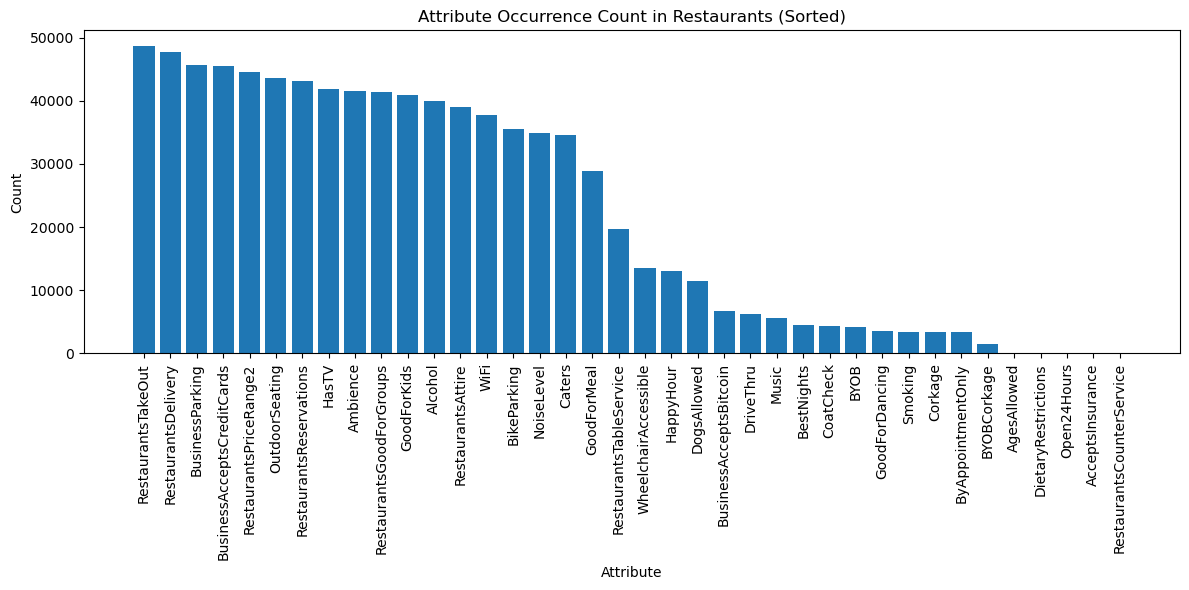

In [52]:

# Get the indices that would sort the 'tally' list in descending order
sorted_indices = sorted(range(len(tally)), key=lambda k: tally[k], reverse=True)

# Rearrange the 'attributes' and 'tally' lists based on the sorted indices
sorted_attributes = [attributes[i] for i in sorted_indices]
sorted_tally = [tally[i] for i in sorted_indices]

# Plot the sorted results
plt.figure(figsize=(12, 6))
plt.bar(sorted_attributes, sorted_tally)

plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Count')
plt.title('Attribute Occurrence Count in Restaurants (Sorted)')
plt.tight_layout()
plt.show()


{'ByAppointmentOnly', 'WiFi', 'OutdoorSeating', 'GoodForKids', 'RestaurantsDelivery',  'RestaurantsReservations', 'Caters', 'Ambience', 'RestaurantsGoodForGroups', 'RestaurantsTakeOut', 'Alcohol', 'RestaurantsAttire', 'HappyHour', 'WheelchairAccessible', 'RestaurantsPriceRange2', 'BikeParking', 'BusinessParking', 'NoiseLevel'}


we decided to  remove the attributes with leass than 1000 occurence and calculate how many restaurant reviews contain all of the other attributes.
we also removed some of the attributes that are not important and useful to the analyse like 'has TV','BusinessAcceptsCreditCards'& etc..

Attributes column contains dictionary and 3 nested dictionary. To proceed, we will use the ast library to unpack all dictionaries.

## Extracting Key Attributes from the Dataset

Our dataset contains a wide array of attributes for restaurants, which are stored as strings representing dictionaries within the `'attributes'` column. However, we are interested in a specific subset of these attributes. The code snippet performs the following actions to focus on these selected attributes:

1. **Convert Strings to Dictionaries**: The `ast.literal_eval` function is used to convert the strings in the `'attributes'` column to dictionaries. This is done using the `apply` method along with a lambda function that checks whether each value is a string before applying the conversion. If a value is not a string (for example, if it is `None`), it is left unchanged.

2. **Define Key Attributes**: A list called `keys_to_keep` is defined, containing the specific attribute keys we are interested in. These include attributes such as `'WiFi'`, `'OutdoorSeating'`, `'GoodForKids'`, and so on.

3. **Create New Columns for Key Attributes**: For each key in the `keys_to_keep` list, a new column is created in the DataFrame. The value for each restaurant in these new columns is obtained from the corresponding dictionary in the `'attributes'` column, using the key. If the key is not found in the dictionary, or if the value is not a dictionary (such as when it's `None`), a `NaN` value is assigned.

By extracting these specific attributes and placing them in separate columns, the DataFrame becomes more accessible and ready for further analysis, focusing only on the aspects of the data that are most relevant to our study. This process enhances readability and efficiency in subsequent steps.


In [53]:
import ast

# Convert the strings into dictionaries for 'attributes' column
df_b['attributes'] = df_b['attributes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

keys_to_keep = ['WiFi', 'OutdoorSeating', 'GoodForKids', 'RestaurantsDelivery', 'RestaurantsReservations', 'Caters', 'Ambience', 'RestaurantsGoodForGroups', 'RestaurantsTakeOut', 'Alcohol', 'RestaurantsAttire', 'HappyHour', 'WheelchairAccessible', 'RestaurantsPriceRange2', 'BikeParking', 'BusinessParking', 'NoiseLevel']

# For each key, create a new column in the DataFrame
for key in keys_to_keep:
    df_b[key] = df_b['attributes'].apply(lambda x: x.get(key) if isinstance(x, dict) else np.nan)



In [54]:
df_b.columns

Index(['attributes', 'Rating_Success', 'acai bowls', 'active life', 'african',
       'arcades', 'asian fusion', 'automotive', 'bagels', 'bakeries',
       ...
       'RestaurantsGoodForGroups', 'RestaurantsTakeOut', 'Alcohol',
       'RestaurantsAttire', 'HappyHour', 'WheelchairAccessible',
       'RestaurantsPriceRange2', 'BikeParking', 'BusinessParking',
       'NoiseLevel'],
      dtype='object', length=136)

# BusinessParking Column
is a nested dictionary which was inside `attributes` column

In [55]:
df_b['BusinessParking'].value_counts().head(5)

BusinessParking
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     17454
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}     9842
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}      7223
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}       2612
None                                                                                      738
Name: count, dtype: int64

In [56]:
# Convert the strings into dictionaries for 'BusinessParking' column
df_b['BusinessParking'] = df_b['BusinessParking'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

P_keys = set()

# Iterate over each entry in the 'BusinessParking' column
for attr in df_b['BusinessParking']:
    if isinstance(attr, dict):  # check if the entry is a dictionary
        P_keys.update(attr.keys())

print(P_keys)

{'validated', 'garage', 'street', 'lot', 'valet'}


lets explode it to new columns: 

In [57]:

# For each key in 'BusinessParking', create a new column in the DataFrame
for key in P_keys:
    df_b[key] = df_b['BusinessParking'].apply(lambda x: x.get(key) if isinstance(x, dict) else np.nan)



In [58]:
for i in P_keys :
    print(df_b[i].value_counts(),'\n')

validated
False    42712
True       522
Name: count, dtype: int64 

garage
False    41304
True      2083
Name: count, dtype: int64 

street
False    29893
True     12483
Name: count, dtype: int64 

lot
True     23177
False    19959
Name: count, dtype: int64 

valet
False    43785
True      1085
Name: count, dtype: int64 



In [59]:
# Convert the set to a list
P_keys_list = list(P_keys)

# Convert parking columns to boolean type
df_b[P_keys_list] = df_b[P_keys_list].astype(bool)

# Initialize the 'ParkingAvailability' column
df_b['ParkingAvailability'] = False

# Iterate through the parking keys and update 'ParkingAvailability'
for col in P_keys_list:
    df_b['ParkingAvailability'] |= df_b[col]

# Print the value counts
print(df_b['ParkingAvailability'].value_counts(dropna=False))


ParkingAvailability
True     40212
False    11491
Name: count, dtype: int64


In [60]:
df_b.drop(columns=['validated', 'garage', 'valet', 'street', 'lot'], inplace=True)


# Ambience Column

In [61]:
# Convert the strings into dictionaries for 'Ambience' column
df_b['Ambience'] = df_b['Ambience'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize an empty set to store the keys in 'Ambience' column
Ambience_keys = set()

# Find all keys in 'Ambience' column
for entry in df_b['Ambience']:
    if isinstance(entry, dict):
        Ambience_keys.update(entry.keys())

# Now ambience_keys set contains all the unique keys present in the 'Ambience' column dictionaries
Ambience_keys

{'casual',
 'classy',
 'divey',
 'hipster',
 'intimate',
 'romantic',
 'touristy',
 'trendy',
 'upscale'}

In [62]:
# Convert the strings into dictionaries for 'Ambience' column
df_b['Ambience'] = df_b['Ambience'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Ambience_keys = set()

# Find all keys in 'Ambience' column without using dropna
for entry in df_b['Ambience']:
    if isinstance(entry, dict):
        Ambience_keys.update(entry.keys())

# For each key in 'Ambience', create a new column in the DataFrame and fill NaN values with False
for key in Ambience_keys:
    df_b[key] = df_b['Ambience'].apply(lambda x: x.get(key, False) if isinstance(x, dict) else False)


In [63]:
  df_b.columns

Index(['attributes', 'Rating_Success', 'acai bowls', 'active life', 'african',
       'arcades', 'asian fusion', 'automotive', 'bagels', 'bakeries',
       ...
       'ParkingAvailability', 'hipster', 'casual', 'romantic', 'intimate',
       'upscale', 'classy', 'divey', 'trendy', 'touristy'],
      dtype='object', length=146)

In [64]:
for i in Ambience_keys:
    print(df_b[i].value_counts())

hipster
False    46754
True       947
Name: count, dtype: int64
casual
False    29691
True     20066
Name: count, dtype: int64
romantic
False    47943
True       669
Name: count, dtype: int64
intimate
False    46972
True       784
Name: count, dtype: int64
upscale
False    48706
True       412
Name: count, dtype: int64
classy
False    42630
True      5704
Name: count, dtype: int64
divey
False    46655
True      1102
Name: count, dtype: int64
trendy
False    44391
True      2347
Name: count, dtype: int64
touristy
False    48053
True       283
Name: count, dtype: int64


some of the ambiance columns have very few "True" values (e.g., touristy, upscale, romantic). To address this, I decided to combine them into broader categories, namely "Casual" and "Classy." This consolidation allows me to end up with three ambiance columns: "Casual," "Classy," and "Unknown."

To achieve this, I followed the following grouping:

**Casual: I combined the columns (divey, hipster, trendy) as they are related to a more relaxed and informal ambiance.**

**Classy: I combined the columns (intimate, romantic, upscale) as they are associated with a more sophisticated and upscale ambiance.**

By adopting this strategy, I can simplify the representation of ambiance factors while preserving their essential characteristics. The resulting ambiance columns provide a more balanced representation, allowing my logistic regression model to better capture the influence of ambiance on the target variable, which is the restaurant's rating (stars).

In [65]:
for i in Ambience_keys:
    mapping = {
        False: 0,
        True: 1
    }
    df_b[i] = df_b[i].replace(mapping)
    df_b[i].fillna(0,inplace=True)

    # Sanity check: Display the counts of 0s and 1s in the current column
    print(df_b[i].value_counts())


hipster
0.0    50756
1.0      947
Name: count, dtype: int64
casual
0.0    31637
1.0    20066
Name: count, dtype: int64
romantic
0.0    51034
1.0      669
Name: count, dtype: int64
intimate
0.0    50919
1.0      784
Name: count, dtype: int64
upscale
0.0    51291
1.0      412
Name: count, dtype: int64
classy
0.0    45999
1.0     5704
Name: count, dtype: int64
divey
0.0    50601
1.0     1102
Name: count, dtype: int64
trendy
0.0    49356
1.0     2347
Name: count, dtype: int64
touristy
0.0    51420
1.0      283
Name: count, dtype: int64


Now that the attributes column is completely unpacked, we can drop both the attributes, Ambience and the BusinessParking column from the DataFrame.

In [66]:
df_b.drop(columns=['attributes', 'BusinessParking','Ambience'], inplace=True)


Let's take a closer look at all the values in the columns that were exploded from the attributes column.

# WIFI Column

Based on the values in the `WiFi` column, we can convert it into a binary column, where '0' means no WiFi and '1' means WiFi is available. This simplifies the representation and makes it easier to understand the WiFi availability in the dataset.

In [67]:
df_b['WiFi'].value_counts()

WiFi
u'free'    14938
u'no'      11374
'no'        5656
'free'      5483
u'paid'      166
'paid'        95
None          36
Name: count, dtype: int64

In [68]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
wifi_mapping = {
    0: 0,
    "'free'": 1,
    "'no'": 0,
    "'paid'": 1,
    "u'free'": 1,
    "u'no'": 0,
    "None": 0,  
    "'paid'": 1,
    "u'paid'": 1
}

# Replace the string values with corresponding integers
df_b['WiFi'] = df_b['WiFi'].replace(wifi_mapping)

# Convert the 'WiFi' column to integers
df_b['WiFi'] = df_b['WiFi'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check
print(df_b['WiFi'].value_counts())


WiFi
1    20682
0    17066
Name: count, dtype: Int64


In [69]:
df_b['WiFi'].fillna(0, inplace=True)

Now we itteretate the same process we did for WiFi for the rest of columns that extraxted from Attribute column

# OutdoorSeating

In [70]:
df_b['OutdoorSeating'].value_counts()

OutdoorSeating
False    21912
True     19970
None      1757
Name: count, dtype: int64

In [71]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
outdoor_seating_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'OutdoorSeating' column
df_b['OutdoorSeating'] = df_b['OutdoorSeating'].replace(outdoor_seating_mapping)

# Convert the 'OutdoorSeating' column to integers
df_b['OutdoorSeating'] = df_b['OutdoorSeating'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'OutdoorSeating' column
print(df_b['OutdoorSeating'].value_counts())


OutdoorSeating
0    23669
1    19970
Name: count, dtype: Int64


In [72]:
df_b['OutdoorSeating'].fillna(0, inplace=True)

# GoodForKids

In [73]:
df_b['GoodForKids'].value_counts()

GoodForKids
True     34780
False     6175
None        22
Name: count, dtype: int64

In [74]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
good_for_kids_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'GoodForKids' column
df_b['GoodForKids'] = df_b['GoodForKids'].replace(good_for_kids_mapping)

# Convert the 'GoodForKids' column to integers
df_b['GoodForKids'] = df_b['GoodForKids'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'GoodForKids' column
print(df_b['GoodForKids'].value_counts())


GoodForKids
1    34780
0     6197
Name: count, dtype: Int64


In [75]:
df_b['GoodForKids'].fillna(0, inplace=True)

# RestaurantsDelivery

In [76]:
df_b['RestaurantsDelivery'].value_counts()

RestaurantsDelivery
True     27563
False    17495
None      2596
Name: count, dtype: int64

In [77]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
delivery_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'RestaurantsDelivery' column
df_b['RestaurantsDelivery'] = df_b['RestaurantsDelivery'].replace(delivery_mapping)

# Convert the 'RestaurantsDelivery' column to integers
df_b['RestaurantsDelivery'] = df_b['RestaurantsDelivery'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'RestaurantsDelivery' column
print(df_b['RestaurantsDelivery'].value_counts())


RestaurantsDelivery
1    27563
0    20091
Name: count, dtype: Int64


In [78]:
df_b['RestaurantsDelivery'].fillna(0, inplace=True)

# RestaurantsReservations

In [79]:
df_b['RestaurantsReservations'].value_counts()

RestaurantsReservations
False    28428
True     14429
None       249
Name: count, dtype: int64

In [80]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
reservations_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'RestaurantsReservations' column
df_b['RestaurantsReservations'] = df_b['RestaurantsReservations'].replace(reservations_mapping)

# Convert the 'RestaurantsReservations' column to integers
df_b['RestaurantsReservations'] = df_b['RestaurantsReservations'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'RestaurantsReservations' column
print(df_b['RestaurantsReservations'].value_counts())


RestaurantsReservations
0    28677
1    14429
Name: count, dtype: Int64


In [81]:
df_b['RestaurantsReservations'].fillna(0, inplace=True)

# Caters

In [82]:
df_b['Caters'].value_counts()

Caters
True     20533
False    13990
None        47
Name: count, dtype: int64

In [83]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
caters_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'Caters' column
df_b['Caters'] = df_b['Caters'].replace(caters_mapping)

# Convert the 'Caters' column to integers
df_b['Caters'] = df_b['Caters'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'Caters' column
print(df_b['Caters'].value_counts())


Caters
1    20533
0    14037
Name: count, dtype: Int64


In [84]:
df_b['Caters'].fillna(0, inplace=True)

# RestaurantsGoodForGroups

In [85]:
df_b['RestaurantsGoodForGroups'].value_counts()

RestaurantsGoodForGroups
True     35579
False     5840
None        20
Name: count, dtype: int64

In [86]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
good_for_groups_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'RestaurantsGoodForGroups' column
df_b['RestaurantsGoodForGroups'] = df_b['RestaurantsGoodForGroups'].replace(good_for_groups_mapping)

# Convert the 'RestaurantsGoodForGroups' column to integers
df_b['RestaurantsGoodForGroups'] = df_b['RestaurantsGoodForGroups'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'RestaurantsGoodForGroups' column
print(df_b['RestaurantsGoodForGroups'].value_counts())


RestaurantsGoodForGroups
1    35579
0     5860
Name: count, dtype: Int64


In [87]:
df_b['RestaurantsGoodForGroups'].fillna(0, inplace=True)

# RestaurantsTakeOut

In [88]:
df_b['RestaurantsTakeOut'].value_counts()

RestaurantsTakeOut
True     45381
False     2247
None      1085
Name: count, dtype: int64

In [89]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
takeout_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'RestaurantsTakeOut' column
df_b['RestaurantsTakeOut'] = df_b['RestaurantsTakeOut'].replace(takeout_mapping)

# Convert the 'RestaurantsTakeOut' column to integers
df_b['RestaurantsTakeOut'] = df_b['RestaurantsTakeOut'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'RestaurantsTakeOut' column
print(df_b['RestaurantsTakeOut'].value_counts())


RestaurantsTakeOut
1    45381
0     3332
Name: count, dtype: Int64


In [90]:
df_b['RestaurantsTakeOut'].fillna(0, inplace=True)

# Alcohol

In [91]:
df_b['Alcohol'].value_counts()

Alcohol
u'none'             15641
u'full_bar'         11440
'none'               4662
u'beer_and_wine'     4589
'full_bar'           2455
'beer_and_wine'      1159
None                   34
Name: count, dtype: int64

In [92]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
alcohol_mapping = {
    "'none'": 0,
    "'full_bar'": 1,
    "u'none'": 0,
    "u'full_bar'": 1,
    "u'beer_and_wine'": 1,
    "'beer_and_wine'": 1,
    "None": 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'Alcohol' column
df_b['Alcohol'] = df_b['Alcohol'].replace(alcohol_mapping)

# Convert the 'Alcohol' column to integers
df_b['Alcohol'] = df_b['Alcohol'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'Alcohol' column
print(df_b['Alcohol'].value_counts())


Alcohol
0    20337
1    19643
Name: count, dtype: Int64


In [93]:
df_b['Alcohol'].fillna(0, inplace=True)

# RestaurantsAttire

In [94]:
df_b['RestaurantsAttire'].value_counts()

RestaurantsAttire
u'casual'    22976
'casual'     15113
u'dressy'      523
'dressy'       273
'formal'        38
None            37
u'formal'       32
Name: count, dtype: int64

In [95]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
attire_mapping = {
    "u'casual'": 0,
    "'casual'": 0,
    "u'dressy'": 1,
    "'dressy'": 1,
    "u'formal'": 1,
    "'formal'": 1,
    "None": 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'RestaurantsAttire' column
df_b['RestaurantsAttire'] = df_b['RestaurantsAttire'].replace(attire_mapping)

# Convert the 'RestaurantsAttire' column to integers
df_b['RestaurantsAttire'] = df_b['RestaurantsAttire'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'RestaurantsAttire' column
print(df_b['RestaurantsAttire'].value_counts())


RestaurantsAttire
0    38126
1      866
Name: count, dtype: Int64


In [96]:
df_b['RestaurantsAttire'].fillna(0, inplace=True)

# HappyHour

In [97]:
df_b['HappyHour'].value_counts()

HappyHour
True     8530
False    4477
None        2
Name: count, dtype: int64

In [98]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
happy_hour_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'HappyHour' column
df_b['HappyHour'] = df_b['HappyHour'].replace(happy_hour_mapping)



In [99]:
df_b['HappyHour'].fillna(0, inplace=True)

# WheelchairAccessible

In [100]:
df_b['WheelchairAccessible'].value_counts()

WheelchairAccessible
True     12508
False     1038
None         9
Name: count, dtype: int64

In [101]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
wheelchair_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'WheelchairAccessible' column
df_b['WheelchairAccessible'] = df_b['WheelchairAccessible'].replace(wheelchair_mapping)

# Convert the 'WheelchairAccessible' column to integers
df_b['WheelchairAccessible'] = df_b['WheelchairAccessible'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'WheelchairAccessible' column
print(df_b['WheelchairAccessible'].value_counts())


WheelchairAccessible
1    12508
0     1047
Name: count, dtype: Int64


In [102]:
df_b['WheelchairAccessible'].fillna(0, inplace=True)

# BikeParking

In [103]:
df_b['BikeParking'].value_counts()

BikeParking
True     26182
False     9267
None        34
Name: count, dtype: int64

In [104]:
import numpy as np

# Create a mapping to replace string values with corresponding integers
bike_parking_mapping = {
    'False': 0,
    'True': 1,
    'None': 0  # Set 'None' to NaN instead of 0
}

# Replace the string values with corresponding integers in the 'BikeParking' column
df_b['BikeParking'] = df_b['BikeParking'].replace(bike_parking_mapping)

# Convert the 'BikeParking' column to integers
df_b['BikeParking'] = df_b['BikeParking'].astype(float).astype('Int64')  # Use float and Int64 to support NaN

# Sanity check: Display the counts of 0s and 1s in the 'BikeParking' column
print(df_b['BikeParking'].value_counts())


BikeParking
1    26182
0     9301
Name: count, dtype: Int64


In [105]:
df_b['BikeParking'].fillna(0, inplace=True)

# NoiseLevel

In [106]:
df_b['NoiseLevel'].value_counts()

NoiseLevel
u'average'      20087
u'quiet'         6031
'average'        4356
u'loud'          1991
'quiet'          1132
u'very_loud'      721
'loud'            373
'very_loud'       117
None               37
Name: count, dtype: int64

In [107]:
# Create a mapping to replace string values with corresponding integers
attire_mapping = {
    "u'average'": 'Avg',
    "'average'": 'Avg',
    "'quiet'": 'Quiet',
    "u'quiet'": 'Quiet',
    "'loud'": 'Loud',
    "'very_loud'": 'Loud',
    "u'loud'" :'Loud',
    "u'very_loud'" : 'Loud',
    "None": 'Avg'
}

# Replace the string values with corresponding integers in the 'NoiseLevel' column
df_b['NoiseLevel'] = df_b['NoiseLevel'].replace(attire_mapping)

# Fill any NaN values in the 'NoiseLevel' column with 0
#df_b['NoiseLevel'].fillna(0, inplace=True)

# Convert the 'NoiseLevel' column to integers
#df_b['NoiseLevel'] = df_b['NoiseLevel'].astype(int)

# Sanity check: Display the counts of 0s and 1s in the 'NoiseLevel' column
print(df_b['NoiseLevel'].value_counts())


NoiseLevel
Avg      24480
Quiet     7163
Loud      3202
Name: count, dtype: int64


In [108]:
# Create dummy variables for the 'NoiseLevel' column and replace the original column with the dummy variables

df_b = pd.get_dummies(df_b, columns=['NoiseLevel'], prefix='NoiseLevel', drop_first=True)

# RestaurantsPriceRange2

In [109]:
df_b['RestaurantsPriceRange2'].value_counts()

RestaurantsPriceRange2
2       23119
1       19509
3        1662
4         194
None       16
Name: count, dtype: int64

In [110]:
# Create dummy variables for the 'RestaurantsPriceRange2' column and replace the original column with the dummy variables
df_b = pd.get_dummies(df_b, columns=['RestaurantsPriceRange2'], prefix='PriceRange', drop_first=True)


In [111]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51703 entries, 0 to 51702
Columns: 147 entries, Rating_Success to PriceRange_None
dtypes: Int64(12), bool(8), float64(10), int64(117)
memory usage: 55.8 MB


In [112]:
pd.set_option('display.max_columns', None)
df_b.head()

,Rating_Success,acai bowls,active life,african,arcades,asian fusion,automotive,bagels,bakeries,barbeque,beer bar,beer gardens,breakfast & brunch,bubble tea,buffets,burgers,cafes,cajun/creole,canadian (new),caribbean,cheesesteaks,chicken shop,chicken wings,chinese,cocktail bars,coffee & tea,coffee roasteries,comfort food,creperies,cuban,dance clubs,delis,desserts,dim sum,diners,dive bars,donuts,ethnic food,falafel,farmers market,fast food,filipino,fish & chips,food court,food delivery services,food stands,food trucks,french,fruits & veggies,gastropubs,german,gluten-free,greek,grocery,halal,health markets,hookah bars,hot dogs,hotels,ice cream & frozen yogurt,imported food,indian,irish,irish pub,italian,jazz & blues,juice bars & smoothies,karaoke,korean,latin american,local flavor,lounges,meat shops,mediterranean,middle eastern,modern european,new mexican cuisine,noodles,pakistani,party & event planning,pasta shops,pizza,pubs,ramen,salad,sandwiches,seafood,seafood markets,shopping,soul food,soup,southern,spanish,sports bars,steakhouses,street vendors,szechuan,tapas bars,tapas/small plates,tea rooms,tex-mex,thai,vegan,vegetarian,venues & event spaces,vietnamese,waffles,wine bars,wraps,American_cuisine,Bars_nightlife,Beer_wine_spirits,Caterers_event_planning,Specialty_food,Japanese,BrewPub,Hawaiian_poke,Mexican_tacos,WiFi,OutdoorSeating,GoodForKids,RestaurantsDelivery,RestaurantsReservations,Caters,RestaurantsGoodForGroups,RestaurantsTakeOut,Alcohol,RestaurantsAttire,HappyHour,WheelchairAccessible,BikeParking,ParkingAvailability,hipster,casual,romantic,intimate,upscale,classy,divey,trendy,touristy,NoiseLevel_Loud,NoiseLevel_Quiet,PriceRange_2,PriceRange_3,PriceRange_4,PriceRange_None
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.0,0,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0.0,1,0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0.0,0,0,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0.0,1,0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False


# Duplicate-Information

Are there any columns that contain duplicate information? If so, we should remove the redundant columns.


In [113]:
df_b = df_b.reset_index(drop=True)


In [114]:
df_b.shape

(51703, 147)

# Finding-Redundant-Columns

In [115]:
df_b.isna().sum()
for col in df_b.columns:
    if df_b[col].isna().sum() > 0 :
        print (col, df_b[col].isna().sum())

In [116]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51703 entries, 0 to 51702
Columns: 147 entries, Rating_Success to PriceRange_None
dtypes: Int64(12), bool(8), float64(10), int64(117)
memory usage: 55.8 MB


**There is no duplicated columns.**

# Converting-binary-columns-to-uint8
Converting to uint reduces memory usage and ensures optimal performance during modeling.

In [117]:

# Convert binary columns to uint8 data type
df_b = df_b.astype('uint8')


# Print the data types of the DataFrame to verify the conversion
print(df_b.dtypes)


Rating_Success      uint8
acai bowls          uint8
active life         uint8
african             uint8
arcades             uint8
                    ...  
NoiseLevel_Quiet    uint8
PriceRange_2        uint8
PriceRange_3        uint8
PriceRange_4        uint8
PriceRange_None     uint8
Length: 147, dtype: object


# Correlation-Analysis

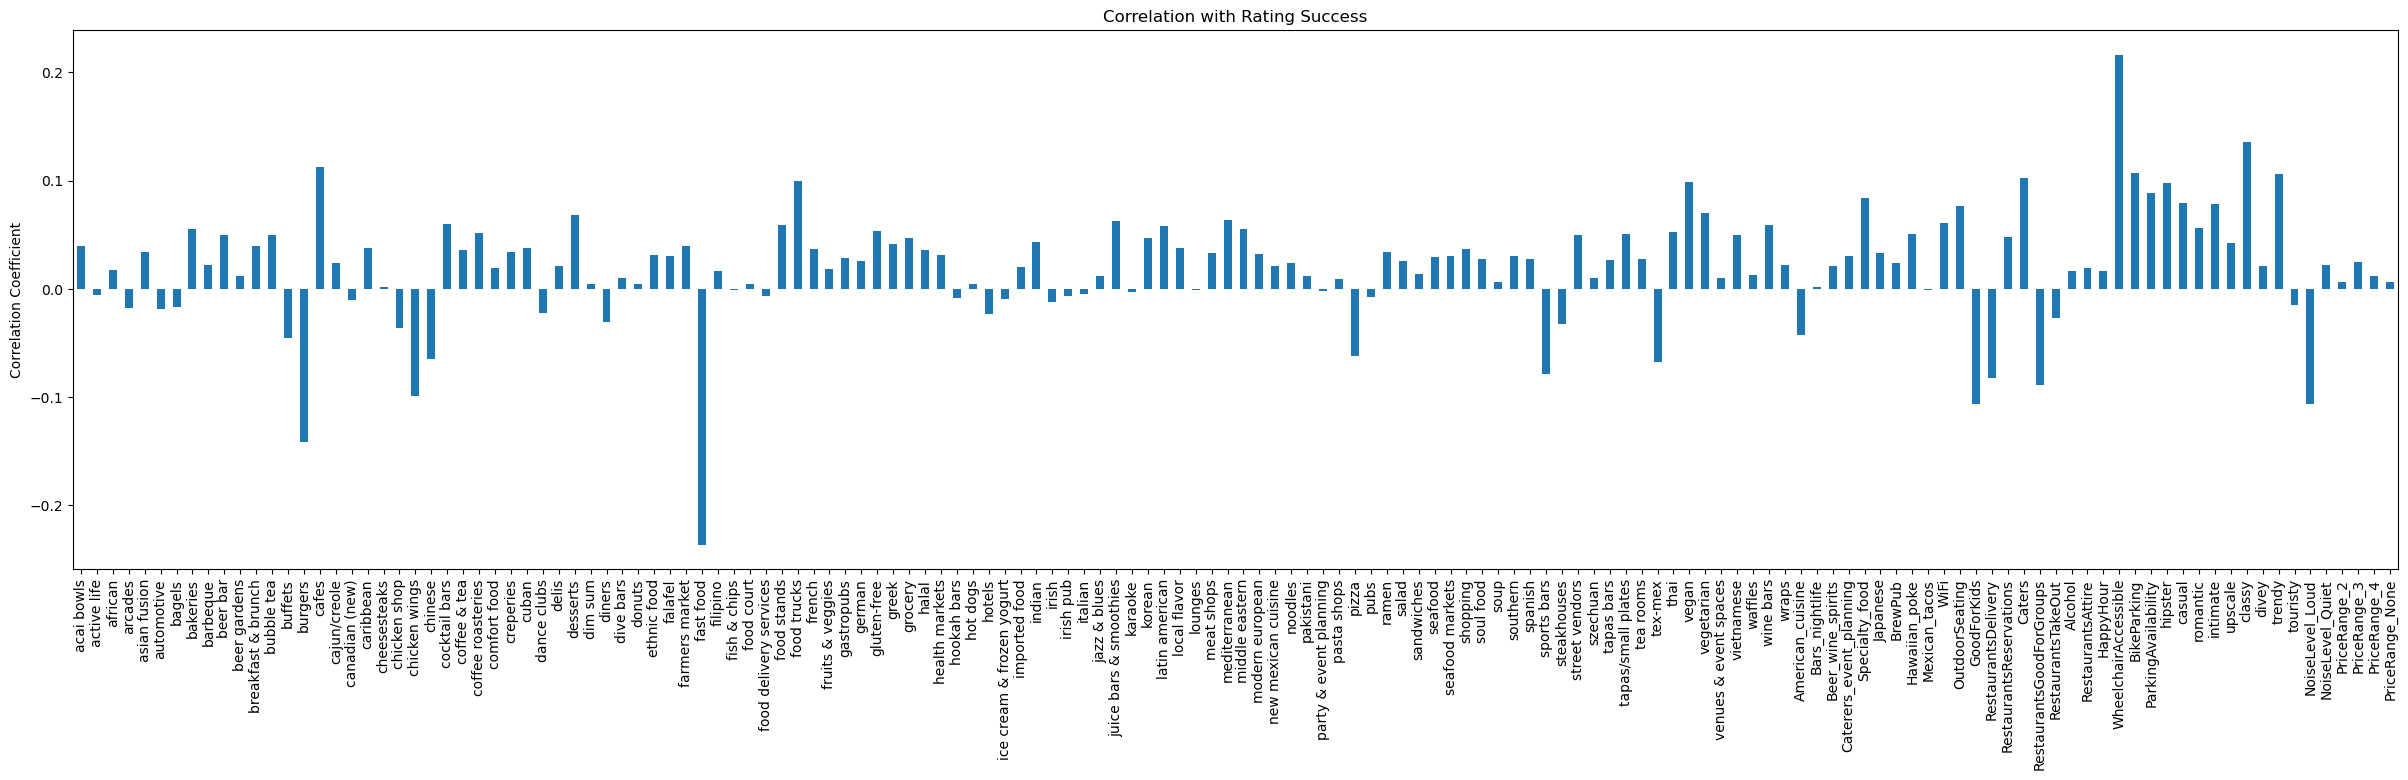

In [118]:
import matplotlib.pyplot as plt


correlation = df_b.corrwith(df_b['Rating_Success'])
correlation.drop('Rating_Success', inplace=True)  # Drop the target variable

correlation.plot(kind='bar', figsize=(30, 7))
plt.title('Correlation with Rating Success')
plt.ylabel('Correlation Coefficient')
plt.show()


In [119]:

correlation_matrix = df_b.corr()

# Get pairs of variables with correlation > 0.50
highly_correlated_pairs = []

for i, row in enumerate(correlation_matrix.index):
    for j, col in enumerate(correlation_matrix.columns):
        # Check for correlation above 0.50 and ensure we're not looking at the diagonal
        if correlation_matrix.iloc[i, j] > 0.50 and i != j:
            # Since the matrix is symmetric, let's only store one of (i,j) or (j,i)
            if (col, row) not in highly_correlated_pairs:
                highly_correlated_pairs.append((row, col))

# Print the results
for pair in highly_correlated_pairs:
    print(f"Variables {pair[0]} and {pair[1]} have a correlation > 0.50")
    



Variables ethnic food and Specialty_food have a correlation > 0.50


In [120]:
df_b['Specialty_food'] = df_b['Specialty_food'] | df_b['ethnic food']
df_b['Indian'] = df_b['indian'] | df_b['pakistani']
df_b['Caterers_event_planning'] = df_b['venues & event spaces'] | df_b['Caterers_event_planning']

df_b.drop(columns=['Specialty_food','ethnic food','pakistani',
                   'indian','venues & event spaces','Caterers_event_planning'],inplace=True)

df_b.reset_index(drop=True, inplace=True)

## Analysis of Correlation with `Rating_Success`

We've explored how various features in our dataset correlate with `Rating_Success`. The objective was to identify factors that have the most significant positive and negative influence on rating success.

### Top 8 Negative Correlations with `Rating_Success`:

1. **Fast Food**: -0.2364
    - Indicates that establishments categorized as fast food tend to have lower rating success.
    
2. **Burgers**: -0.1414
    - Burger joints or places primarily selling burgers seem to have a negative impact on rating success.
    
3. **NoiseLevel_Loud**: -0.1068
    - Loud noise levels tend to be associated with lower rating success, possibly pointing towards customer preference for quieter dining experiences.
    
4. **GoodForKids**: -0.1068
    - Surprisingly, places deemed good for kids have a negative correlation, suggesting that other factors might be impacting the rating.
    
5. **Chicken Wings**: -0.0993
    - Establishments focusing on chicken wings have a slightly negative correlation with rating success.
    
6. **RestaurantsGoodForGroups**: -0.0887
    - Places good for groups are negatively correlated, which might imply larger group settings don't always equate to higher ratings.
    
7. **RestaurantsDelivery**: -0.0826
    - Restaurants offering delivery services have a slight negative correlation with rating success.
    
8. **Sports Bars**: -0.0791
    - Sports bars seem to have a minor negative impact on rating success.

### Top 8 Positive Correlations with `Rating_Success`:

1. **WheelchairAccessible**: 0.2166
    - Accessibility plays a significant role in rating success, emphasizing the importance of catering to all potential customers.
    
2. **Classy**: 0.1355
    - Establishments perceived as "classy" have a positive influence on rating success, indicating a preference for more upscale dining experiences.
    
3. **Cafes**: 0.1122
    - Cafes positively correlate with rating success, possibly due to their casual and relaxed environment.
    
4. **BikeParking**: 0.1069
    - Bike parking facilities can positively influence rating success, indicating an eco-friendly or health-conscious clientele base.
    
5. **Trendy**: 0.1064
    - Trendy places are favored, suggesting that modern and fashionable establishments resonate more with customers.
    
6. **Caters**: 0.1022
    - Catering services seem to enhance rating success, indicating that additional services or offerings can be beneficial.
    
7. **Food Trucks**: 0.0998
    - The unique experience and diverse food options from food trucks might be leading to their positive correlation with rating success.
    
8. **Vegan**: 0.0990
    - Vegan options or establishments cater to a growing demand and reflect positively on rating success.

### Conclusion:

The above correlations offer a snapshot of the features that significantly impact rating success. While correlation does not imply causation, these insights can guide further investigations and strategies to improve rating success.


## Importance of Understanding Correlation Before Modeling

Before delving into the intricate world of modeling, it's pivotal to have a snapshot of the correlations between various features and our target variable, `Rating_Success`. Here's why:

1. **Feature Importance**: Correlation gives us an initial sense of which features might be most influential in predicting our target variable. This can guide feature selection and help prioritize which variables to include in our models.

2. **Multicollinearity**: By observing the inter-correlations between predictors, we can detect multicollinearity, which can distort model results and lead to overfitting. Recognizing this early on can save significant modeling efforts down the line.

3. **Domain Understanding**: Having a grasp on how different features correlate with the target variable aids in understanding the domain better. For instance, knowing that `WheelchairAccessible` has a positive correlation with `Rating_Success` emphasizes the significance of inclusivity in the restaurant industry.

4. **Hypothesis Generation**: Observing correlations can help generate hypotheses. For example, if we notice a negative correlation between `NoiseLevel_Loud` and `Rating_Success`, we might hypothesize that customers prefer quieter dining experiences.

5. **Data Sanity Check**: Sometimes, the correlations can also serve as a sanity check. If we expect a feature to be positively correlated with the target based on domain knowledge but find a strong negative correlation instead, it might be worth diving deeper into the data or the data collection process.

6. **Model Interpretability**: Understanding the relationships between features and the target variable can also aid in interpreting model results and explaining them to stakeholders.

In conclusion, while correlation does not imply causation, having a snapshot of the correlations in our dataset provides invaluable insights and sets the stage for more effective and informed modeling.


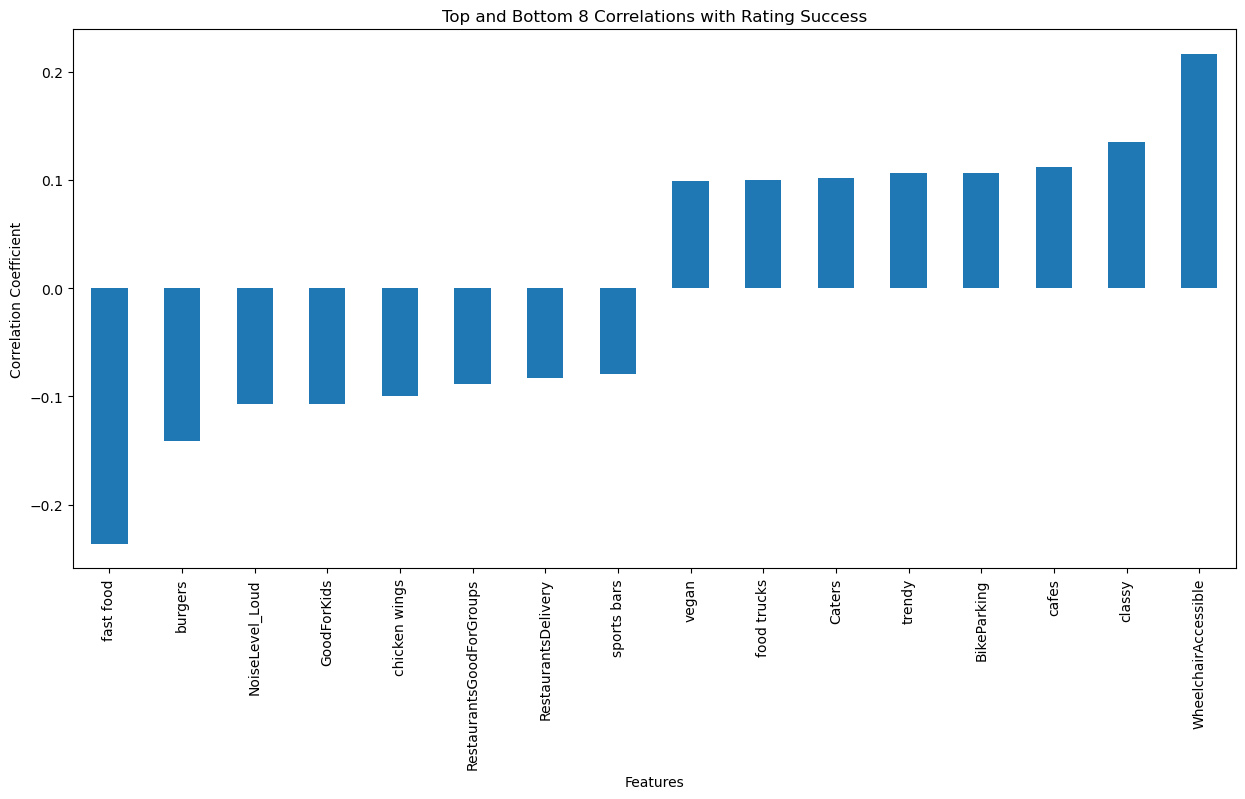

In [122]:
# Step 1: Sort the correlations
sorted_corr = correlation.sort_values()

# Step 2: Get the top 8 and bottom 8 correlations
top_8 = sorted_corr.tail(8)
bottom_8 = sorted_corr.head(8)

# Combine the top and bottom correlations
combined_corr = pd.concat([bottom_8, top_8])

# Step 3: Visualize the correlations
combined_corr.plot(kind='bar', figsize=(15, 7))
plt.title('Top and Bottom 8 Correlations with Rating Success')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


# Saving-the-cleaned-data

In [ ]:
df_b.to_csv('data/cleaned_data.csv', index=False)
